#Ejercicio Deep Learning - Frozen lake



In [1]:
!pip install gym==0.17.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 72.8 MB/s eta 0:00:00
  Created wheel for gym: filename=gym-0.17.3-py3-none-any.whl size=1654617 sha256=ff1569bc9e9aae75192ed03992e7b08e35d85c0b6ac7b51ee17f6b7dcbc84f28
  Stored in directory: /root/.cache/pip/wheels/af/4b/74/fcfc8238472c34d7f96508a63c962ff3ac9485a9a4137afd4e
Successfully built gym
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 2.2.1
    Uninstalling cloudpickle-2.2.1:
      Successfully uninstalled cloudpickle-2.2.1
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2


In [2]:
import gym
import numpy as np

environment = gym.make("FrozenLake-v0", is_slippery=False)

environment.reset()

0

In [3]:
#Cantidad de espacios que hay en el problema. En este caso el primer espacio es el 0 y el último el 15.
environment.observation_space.n

16

In [4]:
#Cantidad de movimientos que puede hacer el personaje

#0: LEFT

#1: DOWN

#2: RIGHT

#3: UP

environment.action_space.n

4

![image.png]()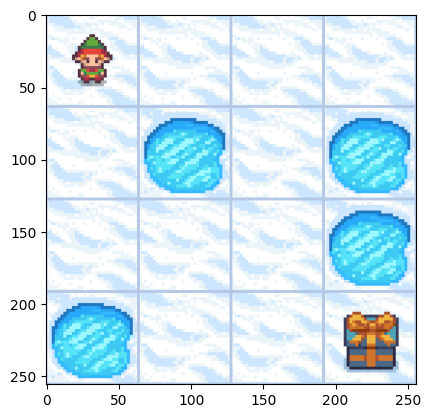

In [5]:
#Muestra del tablero y como se distribuyen las condiciones.

#S = Salida
#F = Frozen
#H = Hueco en el que el personaje se cae
#G = Punto de llegada o éxito
environment.render()


SFFF
FHFH
FFFH
HFFG


In [6]:
# Reiniciamos la tabla Q
qtable = np.zeros((environment.observation_space.n, environment.action_space.n))

In [7]:
# Hiperparámetros
episodes = 1000        # Numero total de episodios
alpha = 0.5            # Learning rate - tasa aprendizaje
gamma = 0.9            # Discount factor - Factor de descuento
epsilon = 1.0         # Grado de aleatoriedad en la selección de acciones
epsilon_decay = 0.001  # Cantidad fija a disminuir

In [8]:
import matplotlib.pyplot as plt

# Lista de resultados a trazar
outcomes = []

print('Q-table before training:')
print(qtable)

# Entrenamiento
for _ in range(episodes):
    state = environment.reset()
    done = False

    # Por defecto, consideramos que nuestro resultado es un fracaso
    outcomes.append("Failure")

    # Hasta que el agente se atasque en un agujero o alcance la meta, sigue entrenándolo
    while not done:
        # Generar un número aleatorio entre 0 y 1
        rnd = np.random.random()

        # Si el número aleatorio < epsilon, realiza una acción aleatoria
        if rnd < epsilon:
          action = environment.action_space.sample()
        # Si no, realiza la acción con el valor más alto en el estado actual
        else:
          action = np.argmax(qtable[state])

        # Ejecuta esta acción y mueve al agente en la dirección deseada
        new_state, reward, done, info = environment.step(action)

        # Actualizar Q(s,a)
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])

        # Actualizar nuestro estado actual
        state = new_state

        # Si tenemos una recompensa, significa que nuestro resultado es un éxito
        if reward:
          outcomes[-1] = "Success"

    # Actualizar epsilon
    epsilon = max(epsilon - epsilon_decay, 0)

print()
print('===========================================')
print('Q-table after training:')
print(qtable)



Q-table before training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Q-table after training:
[[0.531441   0.59049    0.59049    0.531441  ]
 [0.531441   0.         0.6561     0.58693537]
 [0.58962452 0.729      0.58585665 0.63844757]
 [0.65559554 0.         0.23915677 0.42838612]
 [0.59049    0.6561     0.         0.531441  ]
 [0.         0.         0.         0.        ]
 [0.         0.81       0.         0.65092904]
 [0.         0.         0.         0.        ]
 [0.6561     0.         0.729      0.59049   ]
 [0.6561     0.81       0.81       0.        ]
 [0.729      0.9        0.         0.729     ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.80998588 0.9        0.72863614]
 [0.81       0.9        1.         0.81      ]
 [0.

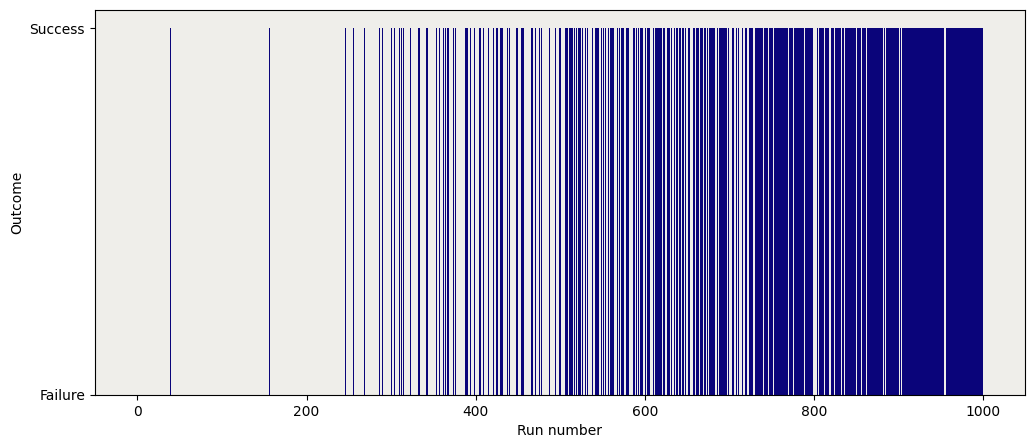

Success rate = 100.0%


In [9]:
# Resultados de la trama
plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color="#0A047A", width=1.0)
plt.show()

episodes = 100
nb_success = 0

# Evaluación
for _ in range(100):
    state = environment.reset()
    done = False

    # Hasta que el agente se atasque o alcance el objetivo, sigue entrenándolo
    while not done:
        # Elige la acción con el valor más alto en el estado actual
        action = np.argmax(qtable[state])

        # Ejecuta esta acción y mueve al agente en la dirección deseada
        new_state, reward, done, info = environment.step(action)

        # Actualizar nuestro estado actual
        state = new_state

        # Cuando obtenemos una recompensa, significa que hemos resuelto el juego
        nb_success += reward

# Comprobemos nuestro porcentaje de éxito.
print (f"Success rate = {nb_success/episodes*100}%")

En este caso, vemos que al ser un problema sencillo, con 1000 repeticiones somos capaces de tener un exito del 100%. Esto quiere decir que el modelo ha aprendido a la perfección el recorrido y al final es capaz de hacerlo sin problemea.

En este modelo, vemos como tenemos cargado el modelo con "is_slippery=False"


Cuando is_slippery=True, significa que el hielo es resbaladizo y el agente tiene una cierta probabilidad de deslizarse hacia una casilla adyacente en la dirección deseada, incluso si intenta moverse en una dirección específica. Esto introduce un grado de estocasticidad en el entorno, ya que las acciones del agente no siempre producirán el resultado esperado debido al deslizamiento.

Por otro lado, si is_slippery=False, significa que el hielo no es resbaladizo y el agente se mueve de manera determinista según las acciones que tome, sin deslizarse a casillas adyacentes.

Por lo tanto, al configurar is_slippery=True, el problema FrozenLake se vuelve más desafiante, ya que el agente debe tener en cuenta el deslizamiento al planificar sus movimientos y tomar decisiones más cuidadosas para llegar al objetivo con éxito.

#Modelo con suelo deslizante (is_slippery=True)

In [10]:
import gym
import numpy as np

environment1 = gym.make("FrozenLake-v0", is_slippery=True)

environment1.reset()

0

In [11]:
# Reiniciamos la tabla Q
qtable = np.zeros((environment1.observation_space.n, environment1.action_space.n))

In [12]:
# Hiperparámetros
episodes = 10000       # Numero total de episodios
alpha = 0.5            # Learning rate - tasa aprendizaje
gamma = 0.9            # Discount factor - Factor de descuento
epsilon = 1.0         # Grado de aleatoriedad en la selección de acciones
epsilon_decay = 0.001  # Cantidad fija a disminuir

In [13]:
import matplotlib.pyplot as plt

# Lista de resultados a trazar
outcomes = []

print('Q-table before training:')
print(qtable)

# Entrenamiento
for _ in range(episodes):
    state = environment1.reset()
    done = False

    # Por defecto, consideramos que nuestro resultado es un fracaso
    outcomes.append("Failure")

    # Hasta que el agente se atasque en un agujero o alcance la meta, sigue entrenándolo
    while not done:
        # Generar un número aleatorio entre 0 y 1
        rnd = np.random.random()

        # Si el número aleatorio < epsilon, realiza una acción aleatoria
        if rnd < epsilon:
          action = environment1.action_space.sample()
        # Si no, realiza la acción con el valor más alto en el estado actual
        else:
          action = np.argmax(qtable[state])

        # Ejecuta esta acción y mueve al agente en la dirección deseada
        new_state, reward, done, info = environment1.step(action)

        # Actualizar Q(s,a)
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])

        # Actualizar nuestro estado actual
        state = new_state

        # Si tenemos una recompensa, significa que nuestro resultado es un éxito
        if reward:
          outcomes[-1] = "Success"

    # Actualizar epsilon
    epsilon = max(epsilon - epsilon_decay, 0)

print()
print('===========================================')
print('Q-table after training:')
print(qtable)



Q-table before training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Q-table after training:
[[1.15939486e-01 5.33779588e-03 5.32818221e-03 5.23404456e-03]
 [2.02039768e-03 2.87906916e-03 1.46670457e-03 8.43974847e-02]
 [2.42898846e-03 4.87364566e-02 2.21996280e-03 2.40497119e-03]
 [1.42452479e-03 1.33551952e-03 1.06888385e-03 3.40875982e-02]
 [1.62533927e-01 6.00678565e-03 6.69795135e-03 7.35988089e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.28140489e-04 3.15642716e-04 1.12857333e-01 4.61901919e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.06569809e-02 1.06452702e-02 1.46845586e-02 2.63610249e-01]
 [2.81185517e-02 2.83017431e-01 2.18128418e-02 2.51495055e-02]
 [2.12241758e-01 7.15777015e-03 8.90815435e-03 6.05884341e-03]
 [0.00000000e+00

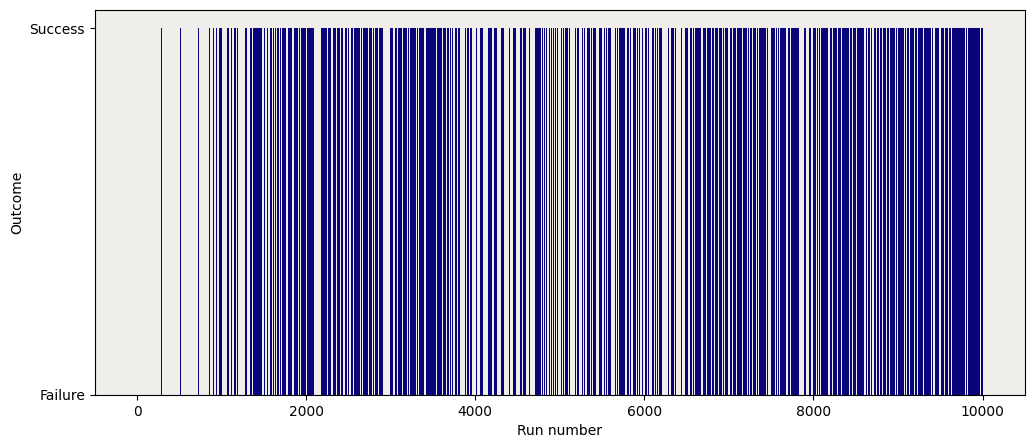

Success rate = 74.0%


In [14]:
# Resultados de la trama
plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color="#0A047A", width=1.0)
plt.show()

episodes = 100
nb_success = 0

# Evaluación
for _ in range(100):
    state = environment1.reset()
    done = False

    # Hasta que el agente se atasque o alcance el objetivo, sigue entrenándolo
    while not done:
        # Elige la acción con el valor más alto en el estado actual
        action = np.argmax(qtable[state])

        # Ejecuta esta acción y mueve al agente en la dirección deseada
        new_state, reward, done, info = environment1.step(action)

        # Actualizar nuestro estado actual
        state = new_state

        # Cuando obtenemos una recompensa, significa que hemos resuelto el juego
        nb_success += reward

# Comprobemos nuestro porcentaje de éxito.
print (f"Success rate = {nb_success/episodes*100}%")

En esta ocasión vemos como el porcentaje de éxito es mucho menor, incluso entrenando el modelo con 10 veces mas de intentos, de 1.000 a 10.000. El success rate baja debido a que se introduce esa variable "incontrolable" de resbalar en las zonas heladas, un problema más parecido a la vida real.